# ML Exploration Notebook

This notebook can be used to explore the data of an underlying problem and see if the data is suited for predictive analysis. Several regressions will be compared on predictive performance metrics R2, mean squared error and mean average error, such that the user can get a head start in solving the problem or managing expectations.

The notebook is structured in the following way:

    1. Set project path
    2. Read in (raw) Data Set
    3. Basic Data Information
    4. Set Dependent & Independent Variables 
    5. Set Parameter Values
    6. Generate Predictions
    7. Compare Models

### 1. Set project path

In [14]:
import os
project_path = os.getcwd()

### 2. Read in (raw) Data Set

The (raw) data set of the underlying problem is read from a comma seperated file (.csv). 
Please specify the full path of the file as a raw string (e.g. r'C:\Users\PippiLongstocking\DataSet.csv').

In [15]:
import pandas as pd
data_path = project_path + "\data\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(data_path)

### 3. Basic Data Information

Below you can find some basic information of the data set. It lists the first couple of rows, a summary of the dataframe including the dtype and number of non-null values per column and the shape of the dataframe.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [17]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


If you'd like to change a column's dtype to numeric, please add this column to the list of strings below (e.g. columns2num = ['Age'])

In [18]:
from functions.data_preparation import column2num
columns2num = []

if len(columns2num) > 0:
    data = column2num(data, columns2num)

We can check the number of NaN values for each column.

In [19]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We'll state the number of unique values per column. If a column only has one value, it will not have any impact on a prediction.

In [20]:
print('Unique Values for Each Feature: \n')
for i in data.columns:
    print(i, ':', data[i].nunique())

Unique Values for Each Feature: 

Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
EmployeeNumber : 1470
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


We can have a look at the correlation matrix to get an idea of relations between variables.

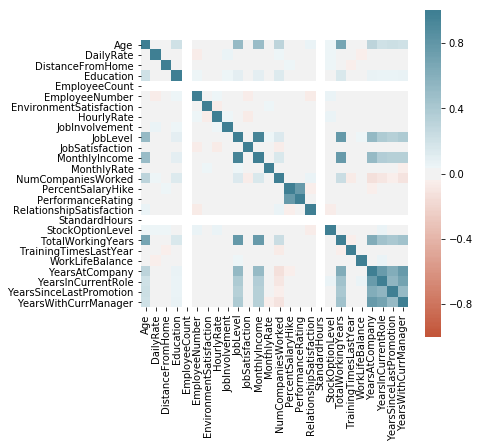

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = round(data.corr(method='pearson'), 2)
sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0, annot=False, cmap=sns.diverging_palette(20, 220, n=200), square=True)

### 4. Set Dependent & Independent Variables

Specify below in string which variable (i.e. column) will be used as dependent variable. This variable will be set as y (i.e. label) and will ultimately be modeled. Also, specify a list of other (independent) variables in string that are used to explain the dependent variable. If empty, all other variables will be used.

In [22]:
dependent = 'MonthlyIncome'  # fill in your dependent variable here...
independent = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'] # fill the list of independent variables here...

### 5. Set Parameter Values

Specify below the parameter values used while comparing models. If kept commented, the default value will be used. If uncommented, added these parameters to the function main.

In [26]:
impute_strategy = 0.  # either a float or 'drop' (default), 'mean', 'median', 'most_frequent'
labelenc_x = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']  # fill the list of independent variables for label encoding here...
onehotenc_x = []  # fill the list of independent variables for one hot encoding
feature_scaling = 'auto'  # None, 'standardisation', 'minmax' or 'auto'

### 6. Generate Predictions

Predictions are generated for several models using the function main from the Python script compare_models. Note that if not specified differently, all default parameter values are used. More information can be retrieved by running main_regression()

In [27]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from functions.compare_models import main_regression
predictions = main_regression(data, dependent, independent, impute_strategy=impute_strategy, labelenc_x=labelenc_x, onehotenc_x=onehotenc_x, feature_scaling_method=feature_scaling)

C:\Users\RoosRooijakkers\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### 7. Compare Models

Models are compared based on predictive performance metrics that are calculated and sorted by the function sort_compute_metrics_regr in the Python script compare_models. The confusion matrices are drawn using the function draw_confusion_matrix in the Python script compare_models. More information on both function can be retrieved using sort_compute_metrics_regr() and draw_residual_plot().

In [28]:
from functions.compare_models import sort_compute_metrics_regr
header, scores = sort_compute_metrics_regr(predictions)
pd.DataFrame(scores, columns=header)

,model,explained_variance_score,mse,mae,r2
0,OLS,0.912683,2.080415e+06,1098.85165,0.912467
1,BayesianRidge,0.912497,2.084796e+06,1098.58845,0.912283
2,Ridge,0.911565,2.106852e+06,1102.16535,0.911355
3,DecisionTreeRegressor,0.713380,6.981768e+06,2083.17655,0.706243
4,knn,0.649058,8.653651e+06,2157.95500,0.635899
5,SVM,0.001951,2.778463e+07,3461.59765,-0.169034


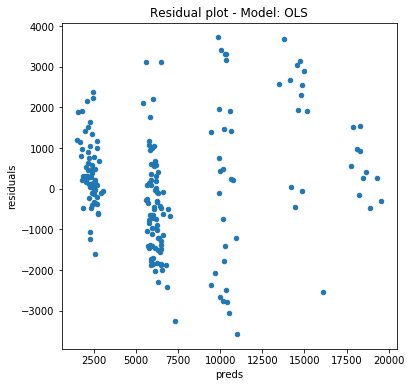

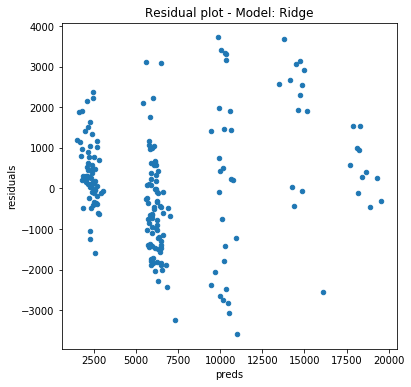

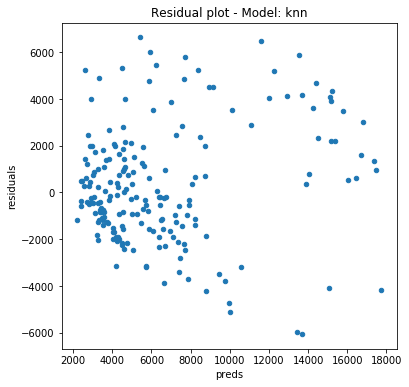

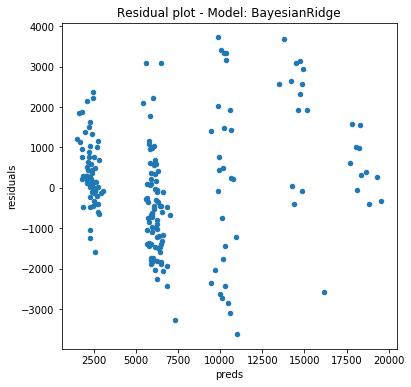

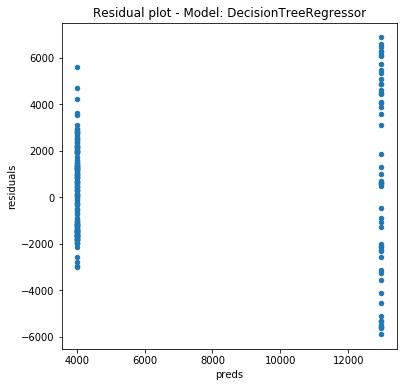

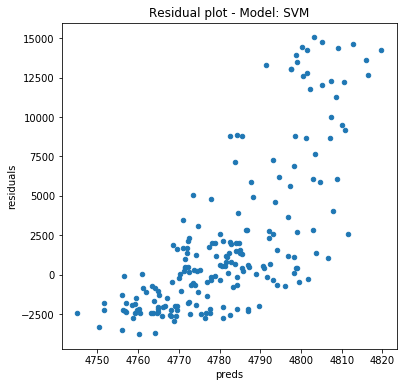

In [13]:
from functions.compare_models import draw_residual_plot
draw_residual_plot(predictions)